---
title: "Data Cleaning in Python"
subtitle: "CU Psych Scientific Computing Workshop"
weight: 1201
tags: ["core", "python"]

---

## Goals of this lesson

### Students will learn:

1. How to open various data types in Python
2. How to check for missing or problematic data and address issues.
3. How to filter, rearrange and shape data in preparation for analysis.

## Links to Files
The files for all tutorials can be downloaded from [the Columbia Psychology Scientific Computing GitHub page](https://github.com/cu-psych-computing/cu-psych-comp-tutorial). This particular file is located here: `/content/tutorials/python/2-data-cleaning/index.ipynb`.

---
## A quick introduction to Python scientific computing modules

As a programming languge, Python can do quite a lot. For example, it is an extremely popular choice for GUI and web-based application development (Reddit, Google, Facebook), databases (Spotify, Netflix), and scientific computing (NASA, for example, but also us!).

One reason that Python is so widely used is due to its extensive library of third-party modules. Let's start by briefly covering the most important modules for scientific computing, some (but not all) of which we'll be using today.

#### Data Analysis
- NumPy: The fundamental package for scientific computing in Python. Numpy provides Python with most of the functionality of MATLAB.
- SciPy: Provides many user-friendly and efficient numerical routines such as routines for numerical integration, interpolation, optimization, linear algebra and statistics.
- Pandas: Provides high-performance, easy-to-use data structures and data analysis tools. Pandas provides Python with most of the functionality of R.

#### Data Visualization
- Matplotlib: Python 2D plotting library which produces publication quality figures. The pyplot module provides a MATLAB-like interface and is what most people use.
- Seaborn: A Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

We'll now import a few of these modules using their standard abbreviations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")
sns.set(style="ticks",font="Arial",font_scale=2)

In order to call one of the functions belonging to a particular module, you can use the `.` syntax. For example, numpy has a `mean()` function which will compute the arithmetic mean across an axis. If we wanted to call that function, we would simply write:

In [2]:
np.mean([2,4,6])

4.0

For those coming from R, this is the equivalent of something like `dplyr::filter()`. Python is stricter than R about making sure you specify from which library the function you are using comes from.

Now that you're familiar with the basics of modules in Python, let's go ahead and move on to some data cleaning.

---
## Python data structures

There are a few ways that data can be stored and manipulated in Python, some of which you've already covered.

To review, the first and most basic is a list:

In [3]:
mylist = [1,2,3]
mylist

[1, 2, 3]

Lists can be arbitrarily long and can store hold multiple types of data, although this isn't usually a good idea:

In [4]:
mylist2 = [1,"2",3.0, [4,5]]
mylist2

[1, '2', 3.0, [4, 5]]

Similar to lists, the numpy module provides the ability to work with n-dimensional arrays for **numerical** data only. We can initialize an array full of zeros using the `np.zeros` function:

In [5]:
myarray = np.zeros((10))
myarray

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

If we want to work with numerical data that has two dimensions, we can create a matrix in a very similar way:

In [6]:
mymatrix = np.zeros((10,2))
mymatrix

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

We won't be working much with numpy arrays directly today, but you should know that they are often a better option than lists when you are working with numerical data.

Today, we will primarily be working with `pandas` dataframes. This object provides functionality that is very similar to dataframes in R. Let's start by converting our empty matrix into a dataframe. We can also give each of our columns more informative names:

In [7]:
mydataframe = pd.DataFrame(mymatrix,columns=["Height","Weight"])
mydataframe

,Height,Weight
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


Another way we can create a dataframe is by first creating a **dictionary** and then converting this to a dataframe. A dictionary is another type of data structure used by python. Dictionaries consist of an unordered collection of key-value pairs. Keys are used to index the dictionary in order to access the values associated with that key. Let's start by making a simple dictionary with one key and one value:

In [8]:
data = {'name':["Monica","Michelle","Paul","Ellen"]}
data

{'name': ['Monica', 'Michelle', 'Paul', 'Ellen']}

If we index this dictionary using the `name` key, it will return the its value, which is a list of names:

In [9]:
data['name']

['Monica', 'Michelle', 'Paul', 'Ellen']

We can also add new key-value pairs to this dictionary:

In [10]:
data['score'] = [16,20,19,35]
data['year'] = [2, 5, 2, 1]
data

{'name': ['Monica', 'Michelle', 'Paul', 'Ellen'],
 'score': [16, 20, 19, 35],
 'year': [2, 5, 2, 1]}

Similar to how we made a dataframe from our numpy array above, we can easily make a dataframe from this dictionary:

In [11]:
dataframe = pd.DataFrame(data)
dataframe

,name,score,year
0,Monica,16,2
1,Michelle,20,5
2,Paul,19,2
3,Ellen,35,1



## Reading data into Python
---


It's easy to introduce errors if you are entering data manually like above, and with a lot of data it would get tedious. Most of the time, you'll be reading data from an external file (.txt or .csv), or opening up an existing dataset in Python. Once you find the location of your files, what you do next will depend on the file format.

#### Reminder about the `os` module

This module provides a way to interface with the operating system we are running Python on (Windows, Mac, or Linux). Let's start by first loading this module:

In [12]:
import os

#### It's always important to check where our working directory is when trying to read data into python

In [13]:
os.getcwd()

'/Users/emily/Documents/GitHub/cu-psych-comp-tutorial/content/tutorials/python/2-data-cleaning'

You can access a list of everything (all files and directories) within your working directory using the `os.listdir()` function...


In [14]:
os.listdir()

['.DS_Store',
 'Study1_Followup.csv',
 'Study2_Subjects.csv',
 'Study1_clean.csv',
 '.ipynb_checkpoints',
 'Study1.csv',
 'challenge',
 'README_Study2.txt',
 'Study2_Trials.csv',
 'index.ipynb']

...as well as in the "Files" tab on the lefthand side of the jupyter lab window.

#### What kind of file do you have?

For .txt, .csv, or any kind of delimited (such as tab-delimited) file, you can use the pandas function `read_table()`:

In [15]:
#help(pd.read_table)

In [16]:
mydata = pd.read_table("Study1.csv", sep=",")

If you know you have a csv file, another common option is `read_csv`, which has a default comma seperator.

Remember, all of these commands can have arguments that will help Python make sense of your data. To find out what arguments are possible, you can use the `help()` function like we did above to look at what `read_table()` does.

To do this, just put whatever command you would like to learn about inside of `help()` (e.g. `help(pd.read_table)`). Remember that for functions associated with a particular module you will need to tell python which module they come from using the `.` syntax.

You can always also Google a function to quickly find this information.

### Inspecting your data

Now you have data, time to get some results! But wait! Are you sure this data is ok? Doing some basic steps to inspect your data now can save you lots of headaches later, and Python makes it really easy.

Start by checking that you have the expected number of rows and columns in your data frame. You can do this by by asking Python:

In [17]:
# get the number of rows and columns
mydata.shape

(50, 9)

In [18]:
# get the names of columns
mydata.columns

Index(['ID', 'Age', 'Sex', 'Condition', 'Personality', 'T1', 'T2', 'T3', 'T4'], dtype='object')

In [19]:
# take a peak at the first few rows
mydata.head()

,ID,Age,Sex,Condition,Personality,T1,T2,T3,T4
0,1,21.0,Female,0,67,5,2,3,1
1,2,22.0,Female,1,63,4,1,5,2
2,3,24.0,Male,1,58,6,2,6,2
3,4,22.0,Female,1,51,2,3,6,5
4,5,19.0,Female,0,49,7,6,5,2


### Rename a variable

Now that we've loaded our data into Python and have made sure it makes sense, we can now start manipulating and cleaning it.

Look back at your data frame. What is the fifth variable? What does that even mean? Luckily, this is your study and you know that it's a personality questionnaire measuring neuroticism. Let's fix that name and make it more intuitive:

In [20]:
mydata = mydata.rename({'Personality':'Neuroticism'}, axis="columns")
mydata.head()

,ID,Age,Sex,Condition,Neuroticism,T1,T2,T3,T4
0,1,21.0,Female,0,67,5,2,3,1
1,2,22.0,Female,1,63,4,1,5,2
2,3,24.0,Male,1,58,6,2,6,2
3,4,22.0,Female,1,51,2,3,6,5
4,5,19.0,Female,0,49,7,6,5,2


We can also rename multiple variables at once:

In [21]:
mydata = mydata.rename({'T1':'Day1',
                        'T2':'Day2',
                        'T3':'Day3',
                        'T4':'Day4'}, axis="columns")
mydata.head()

,ID,Age,Sex,Condition,Neuroticism,Day1,Day2,Day3,Day4
0,1,21.0,Female,0,67,5,2,3,1
1,2,22.0,Female,1,63,4,1,5,2
2,3,24.0,Male,1,58,6,2,6,2
3,4,22.0,Female,1,51,2,3,6,5
4,5,19.0,Female,0,49,7,6,5,2


### Adding a new column 

Often we'll want to add some new data into a dataframe

In [22]:
# here we add a column where are the values are the same string
mydata['studyName'] = 'study1'

# here we add a column 'random' of 50 unique random numbers
mydata['random'] = np.random.random(50)

mydata.head()

,ID,Age,Sex,Condition,Neuroticism,Day1,Day2,Day3,Day4,studyName,random
0,1,21.0,Female,0,67,5,2,3,1,study1,0.166800
1,2,22.0,Female,1,63,4,1,5,2,study1,0.289228
2,3,24.0,Male,1,58,6,2,6,2,study1,0.174662
3,4,22.0,Female,1,51,2,3,6,5,study1,0.384097
4,5,19.0,Female,0,49,7,6,5,2,study1,0.441558


For those coming from R, the python syntax for referencing columns as `df["columnName"]` is roughly equivalent to using the $ operator

### Removing Columns

We can remove columns with the `.drop` function

In [23]:
mydata = mydata.drop(['random', 'studyName'], axis = 1)

## Indexing a dataframe

Sometimes you might want to look at only a subset of the columns in a dataframe (for example, when there are many variables). Doing this with a pandas dataframe is relatively straightforward:

In [24]:
# indexing a single column
ids = mydata[['ID']]
ids.head()

,ID
0,1
1,2
2,3
3,4
4,5


In [25]:
# indexing multiple columns
mydata_subset = mydata[['ID','Age','Neuroticism']]
mydata_subset.head()

,ID,Age,Neuroticism
0,1,21.0,67
1,2,22.0,63
2,3,24.0,58
3,4,22.0,51
4,5,19.0,49


### Using .loc and .iloc to index DataFrames

- If we want to pull out or manipulate specific pieces of DataFrames, we can use the .loc and .iloc functions
- With both functions, the data referenced is always formatted as [selection of rows, selection of columns]

#### .loc takes selections of rows from named columns

So, here we're asking for elements 0:2 from the 'Age' column

In [26]:
mydata.loc[0:2, ['Age']]

,Age
0,21.0
1,22.0
2,24.0


We can also use conditional logic to select rows. Here, we ask for all elements in the 'Age' column that are above 24

In [27]:
mydata.loc[mydata['Age'] > 24, ['Age']]

,Age
5,25.0
17,25.0
25,25.0
27,25.0
37,25.0


#### .iloc takes selections of rows and columns using numeric indices

In [28]:
mydata.iloc[3:7, 1:4]

,Age,Sex,Condition
3,22.0,Female,1
4,19.0,Female,0
5,25.0,Female,1
6,24.0,Female,1


### Check for missing data
One problem you may have is missing data. Sometimes this is something you already know about, but you should check your data frame anyway to make sure nothing got missed in a data entry error. For small datasets, you can do this visually, but for larger ones you can ask Python.

In [29]:
mydata.isnull()
#mydata.isnull().values.any()

,ID,Age,Sex,Condition,Neuroticism,Day1,Day2,Day3,Day4
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In this case, the missing value is the Age value in row 38. You know you have this info somewhere on a paper form, so you go dig it up and want to replace it.


In [30]:
# Verify that this row contains the missing data
mydata.loc[mydata["ID"]==39]

,ID,Age,Sex,Condition,Neuroticism,Day1,Day2,Day3,Day4
38,39,NaN,Female,1,53,1,3,1,3


In [31]:
# Replace row, column with the value 30
mydata.loc[mydata["ID"]==39, "Age"] = 30

In [32]:
# Verify that the replacement worked
mydata.loc[mydata["ID"]==39]

,ID,Age,Sex,Condition,Neuroticism,Day1,Day2,Day3,Day4
38,39,30.0,Female,1,53,1,3,1,3


### Check for correct values

Let's take a look at the `Sex` variable:

In [33]:
mydata['Sex'].head()

0    Female
1    Female
2      Male
3    Female
4    Female
Name: Sex, dtype: object

It looks like there are two categories here, but let's double check. We can use the `unique()` function to list all of the unique values in a column:

In [34]:
mydata["Sex"].unique()

array(['Female', 'Male', 'Femle'], dtype=object)

Here we see another data entry problem. At least one of the rows has a third category label that should really be another case of "Female". Let's replace this label using the `replace()` function:

In [35]:
mydata["Sex"] = mydata["Sex"].replace('Femle', 'Female')

In [36]:
# Verify that the replacement worked
mydata["Sex"].unique()

array(['Female', 'Male'], dtype=object)

Now let's look at some of the continuous variables. You can also look at these by indexing them individually, but sometimes it's easier to visualize. The `hist()` function, which creates histograms, is good here.

Matplotlib is building the font cache using fc-list. This may take a moment.


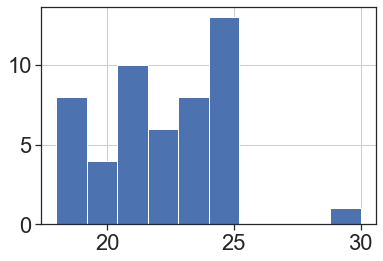

In [37]:
mydata["Age"].hist();

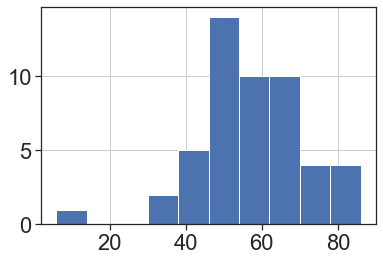

In [38]:
mydata["Neuroticism"].hist();

Looks like we have a potential outlier on the neuroticism score. This could be an entry error, but it could also be a real value that just happens to be really low. This is why data inspection is so important for later analysis -- now you know that value is there, it's up to you to decide how to deal with it.

### Filtering data 
Let's say we have decided a prori to exclude outliers 3SD above or below the mean. We will first define these boundaries:

In [39]:
upper = np.mean(mydata["Neuroticism"]) + 3*np.std(mydata["Neuroticism"])
lower = np.mean(mydata["Neuroticism"]) - 3*np.std(mydata["Neuroticism"])

We can now use conditional indexing to exclude all rows with a Neuroticism score above or below these values:

In [40]:
mydata = mydata[(mydata["Neuroticism"] > lower) & (mydata["Neuroticism"] < upper)]

This line says: return only the Neuroticism values greater than the `lower` boundary and less than the `upper` boundary and then save it in the `mydata` variable

In [41]:
# Verify that we excluded 1 outlier
mydata.shape

(49, 9)

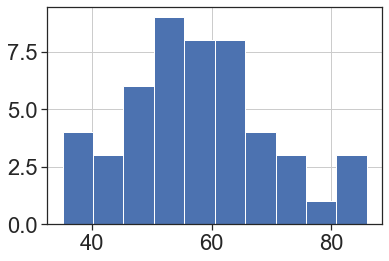

In [42]:
mydata["Neuroticism"].hist();

---
## Getting ready for analysis

Now that we've gone through and cleaned up the problems, you can think ahead to how you'll want to use this data.

### Recoding variables

Sometimes we want to treat categorical variables as factors, but sometimes we want to pretend they're numeric (as in a regression, when binary variables can be coded as 0 and 1). Right now, Condition is coded as a binary numeric variable, but that's not very informative, so you'd rather have the values be descriptive. Here, the function `replace()` is again useful:

In [43]:
mydata['ConditionF'] = mydata['Condition'].replace([0,1], ['Control','Treatment'])

In [44]:
# Verify that your variable is now recoded as you'd like
mydata[['Condition','ConditionF']].head()

,Condition,ConditionF
0,0,Control
1,1,Treatment
2,1,Treatment
3,1,Treatment
4,0,Control


### Calculating new variables

You may also want to recalculate or rescale some variables. For example, we can turn Neuroticism into a Z score, or calculate an average response across the four time points.

To compute a Z score, we can use the `zscore` function from the `scipy.stats` module:

In [45]:
from scipy.stats import zscore

mydata['NeuroticismZ'] = zscore(mydata['Neuroticism'])

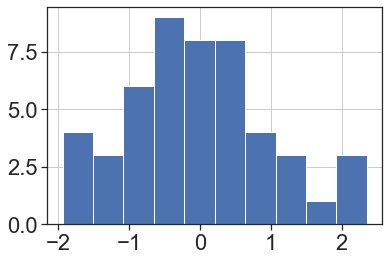

In [46]:
mydata['NeuroticismZ'].hist();

To calculate the means across each day, we can use the `mean` function from pandas on a dataframe that has been indexed to include only data from the four days:

In [47]:
mydata['DayMean'] = mydata[['Day1','Day2','Day3','Day4']].mean(axis="columns")

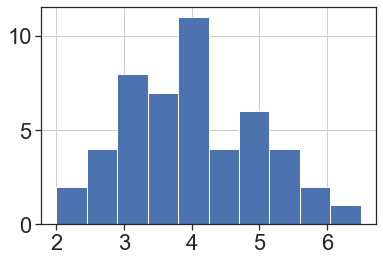

In [48]:
mydata['DayMean'].hist();

### Combining data from multiple sources

Sometimes, data might be spread across multiple files, and you'll want to combine those for your analysis. For example, maybe this study had a follow-up survey on Day 30. Scores from that survey were entered into another spreadsheet, which only has the subject ID and that score. We want to include that score into our data.

In [49]:
# first load the followup dataset
mydata2 = pd.read_csv("Study1_Followup.csv")

We can use the function `merge()` to combine the two dataframes. To make sure the data matches up, we use the `on` argument to specify that IDs should match. That way even if the data is in a different order you will get scores matched together correctly.

In [50]:
mydata = mydata.merge(mydata2,on="ID")
mydata.head()

,ID,Age,Sex,Condition,Neuroticism,Day1,Day2,Day3,Day4,ConditionF,NeuroticismZ,DayMean,Day30
0,1,21.0,Female,0,67,5,2,3,1,Control,0.754583,2.75,6
1,2,22.0,Female,1,63,4,1,5,2,Treatment,0.418450,3.00,6
2,3,24.0,Male,1,58,6,2,6,2,Treatment,-0.001715,4.00,6
3,4,22.0,Female,1,51,2,3,6,5,Treatment,-0.589946,4.00,3
4,5,19.0,Female,0,49,7,6,5,2,Control,-0.758013,5.00,6


### Shaping data

Finally, you may want to change the layout of your data. Right now, our data frame is in "wide" format, which means that each row is a subject, and each observation gets its own column. For some analyses, you'll need to use "long" format, where each row is an observation, and columns specify things like time and ID to differentiate the observations. For this, we can use the `melt()` function in pandas:

In [51]:
value_cols = ["Day1","Day2","Day3","Day4"] # columns we would like to convert to a single "long" column
id_cols = list(mydata.columns) # columns we would like to stay in the same "wide" format
for i in value_cols:
    id_cols.remove(i)

#### Wide --> Long

In [52]:
mydata_Long = pd.melt(mydata,id_vars=id_cols,var_name="Time",value_vars=value_cols,value_name="Score")
mydata_Long.head()

,ID,Age,Sex,Condition,Neuroticism,ConditionF,NeuroticismZ,DayMean,Day30,Time,Score
0,1,21.0,Female,0,67,Control,0.754583,2.75,6,Day1,5
1,2,22.0,Female,1,63,Treatment,0.418450,3.00,6,Day1,4
2,3,24.0,Male,1,58,Treatment,-0.001715,4.00,6,Day1,6
3,4,22.0,Female,1,51,Treatment,-0.589946,4.00,3,Day1,2
4,5,19.0,Female,0,49,Control,-0.758013,5.00,6,Day1,7


#### Long --> Wide
We can go back in the other direction by using the `pivot_table()` function in pandas:

In [53]:
mydata_Wide = mydata_Long.pivot_table(values="Score", index=id_cols, columns='Time').reset_index()
mydata_Wide.columns.name = None
mydata_Wide.head()

,ID,Age,Sex,Condition,Neuroticism,ConditionF,NeuroticismZ,DayMean,Day30,Day1,Day2,Day3,Day4
0,1,21.0,Female,0,67,Control,0.754583,2.75,6,5,2,3,1
1,2,22.0,Female,1,63,Treatment,0.418450,3.00,6,4,1,5,2
2,3,24.0,Male,1,58,Treatment,-0.001715,4.00,6,6,2,6,2
3,4,22.0,Female,1,51,Treatment,-0.589946,4.00,3,2,3,6,5
4,5,19.0,Female,0,49,Control,-0.758013,5.00,6,7,6,5,2


---
## Saving your work

Once you've created a data cleaning script like this one, you'll have a record of all the edits you've made on the raw data, and you can recreate your cleaned data just by running the script again. However, it's often easier to save your cleaned data as its own file **(never overwrite the raw data)**, so when you come back to do analysis you don't have to bother with all the cleaning steps. 

You can always save data frames as a .csv for easy sharing and viewing outside of Python.

In [54]:
# write data to a .csv
mydata.to_csv("Study1_clean.csv",index = False)

---
## Future Directions

Congratulations! You've now cleaned some data in Python and you're ready to start working with your data. This tutorial only went over some basic cleaning steps. As you work with your own data, you may find yourself needing other tools. 


**Next:** [Data Manipulation in Python](/tutorials/python/3-data-manipulation/)